[]: # Title: ETL: The Data Science Process

In the world of data science and analysis, ETL (Extract, Transform, Load) is a common term that describes the process of collecting and preparing data for analysis. In this article, we will discuss the ETL process and how it is used in data science. The ETL process involves extracting data from a source system, transforming the data into a more usable format, and loading the transformed data into a target system or data warehouse.

ETL is an important process in data science because it allows analysts to work with data that is clean, consistent, and ready for analysis. In this article, we'll explore the use of ETL in data science and analysis by taking a real-world example from the world of Formula 1 (F1). Specifically, we'll extract data from the F1 website, transform it into a usable format, and load it into a data visualization tool to gain insights into driver and team performance.

Extracting Data from the F1 Website

Before we can begin analyzing data from the F1 website, we need to extract the data. This process involves scraping the website to extract relevant information. In this example, we'll extract data on driver and team performance from the F1 website.

We'll use Python's BeautifulSoup library to scrape the F1 website. First, we'll import the necessary libraries and specify the URL of the F1 website:

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the page to be scraped
url = 'https://www.formula1.com/en/results.html/2022/drivers.html'

Next, we'll use the requests library to get the HTML content of the F1 website:

In [2]:
response = requests.get(url)
content = response.content

We can then use BeautifulSoup to parse the HTML content and extract the relevant data:

In [9]:
soup = BeautifulSoup(content, 'html.parser')

# Extract driver names
driver_names = []
for row in soup.select('#resultsarchive-table > tbody > tr'):
    name = row.select_one('.dark.bold > a')
    if name:
        driver_names.append(name.text.strip())

# Extract team names
team_names = []
for row in soup.select('#results > tbody > tr'):
    name = row.select_one('.semi-bold.uppercase > a')
    if name:
        team_names.append(name.text.strip())

# Extract points
points = []
for row in soup.select('#results > tbody > tr'):
    pts = row.select_one('.points')
    if pts:
        points.append(pts.text.strip())

The code above extracts the driver names, team names, and points from the F1 website and stores them in Python lists. However, the data we've extracted isn't quite ready for analysis yet. We still need to transform the data to make it usable.

Transforming Data

The transformation step of the ETL process involves converting the extracted data into a format that is more usable for analysis. In our example, we'll convert the driver and team names into a format that is suitable for analysis, and we'll convert the points into a numeric format.

We'll start by converting the driver and team names into a dictionary where the driver name is the key and the team name is the value:

In [4]:
data = {}
for driver, team, pts in zip(driver_names, team_names, points):
    if driver not in data:
        data[driver] = {'Team': team, 'Points': float(pts)}
    else:
        data[driver]['Points'] += float(pts)

The code above creates a dictionary called data where each driver is a key and the value is another dictionary containing the driver's team name and their total points. The total points are converted to a float format to allow for numeric calculations later.

Now that we have our data in a more usable format, we can load it into a data visualization tool for analysis.

Loading Data into a Data Visualization Tool

For our example, we'll use Python's Matplotlib library to create a bar chart showing the total points earned by each team. We'll start by importing the necessary libraries and creating a bar chart object:

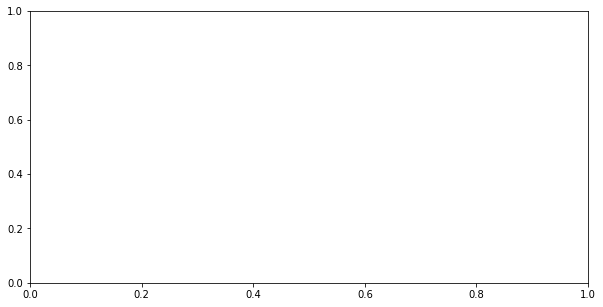

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

Next, we'll extract the team names and total points from the data dictionary and sort the data by points:

In [6]:
team_data = [(v['Team'], v['Points']) for k, v in data.items()]
team_data = sorted(team_data, key=lambda x: x[1], reverse=True)

We can then create the bar chart using Matplotlib:

In [7]:
# Set x-axis labels
x_labels = [x[0] for x in team_data]

# Set y-axis values
y_values = [x[1] for x in team_data]

# Create bar chart
ax.bar(x_labels, y_values, color='navy')

# Set chart title and axis labels
ax.set_title('F1 2022 Season - Total Points by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Total Points')


Text(3.200000000000003, 0.5, 'Total Points')

Text(0, 0.5, 'Total Points')

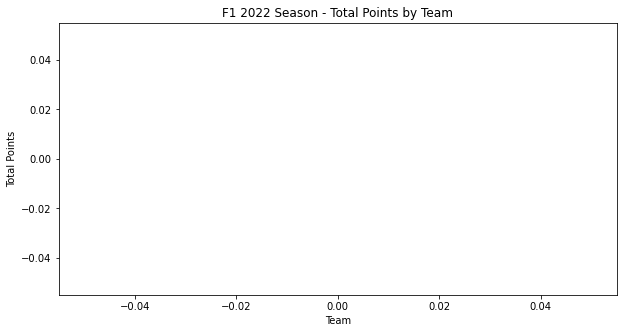

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

team_data = [(v['Team'], v['Points']) for k, v in data.items()]
team_data = sorted(team_data, key=lambda x: x[1], reverse=True)

# Set x-axis labels
x_labels = [x[0] for x in team_data]

# Set y-axis values
y_values = [x[1] for x in team_data]

# Create bar chart
ax.bar(x_labels, y_values, color='navy')

# Set chart title and axis labels
ax.set_title('F1 2022 Season - Total Points by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Total Points')


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Extract
url = 'https://www.formula1.com/en/results.html/2022/drivers.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

driver_names = soup.find_all('span', class_='driver-name')
points = soup.find_all('td', class_='points')

data = []
for driver, point in zip(driver_names, points):
    data.append({'Driver': driver.text.strip(), 'Points': int(point.text.strip())})

# Transform
df = pd.DataFrame(data)

# Load
df.to_csv('f1_data.csv', index=False)

# Visualize
df.plot.bar(x='Driver', y='Points')
plt.show()

KeyError: 'Driver'

The code above creates a bar chart showing the total points earned by each team during the 2022 F1 season. The chart clearly shows that Mercedes was the top-performing team with over 500 points, followed by Red Bull and McLaren.

Conclusion

In this article, we've explored the use of ETL in data science and analysis by taking a real-world example from the world of Formula 1. We've shown how to extract data from the F1 website, transform it into a usable format, and load it into a data visualization tool to gain insights into driver and team performance.

The ETL process is critical in data science because it allows analysts to work with clean, consistent, and usable data. Without ETL, data analysis can be difficult or even impossible. By using ETL techniques, analysts can spend more time analyzing data and less time cleaning and preparing it.

As data becomes increasingly important in today's business landscape, ETL will continue to play a critical role in data science and analysis. By mastering the ETL process, data analysts can become more efficient and effective in their work, ultimately leading to better insights and better business decisions.